In [1]:
import pandas as pd

df = pd.read_csv('cleaned_data_set_NO_anomalies.csv', parse_dates=['timestamp'])

print("Dataset shape:", df.shape)

df.head()


Dataset shape: (17544, 735)


,timestamp,Robin_public_Carolina,Robin_lodging_Dorthy,Robin_education_Zenia,Robin_office_Dina,Robin_education_Derick,Robin_education_Della,Robin_education_Leslie,Robin_office_Sammie,Robin_education_Mercedes,...,Eagle_public_Preston,Eagle_public_Henry,Eagle_education_Norah,Eagle_education_Will,Eagle_education_Petra,Eagle_lodging_Trina,Eagle_health_Amy,Eagle_education_Teresa,Eagle_office_Patrice,Eagle_education_Luther
0,2016-01-01 00:00:00,36.438,14.3,52.25,13.3776,229.0,0.3746,324.75,57.75,80.930,...,247.6250,10.0,426.0,100.875,56.0,17.26,20.0662,98.2779,66.8,433.992
1,2016-01-01 01:00:00,70.750,27.3,106.25,26.7551,449.5,0.7492,624.75,72.00,166.359,...,221.8125,28.0,428.0,101.250,57.0,14.59,21.8903,95.3797,64.2,431.994
2,2016-01-01 02:00:00,74.312,25.7,104.25,26.7551,451.5,0.7492,626.50,66.25,164.868,...,240.0000,27.0,443.0,101.500,74.0,14.09,19.7090,98.0416,64.6,427.992
3,2016-01-01 03:00:00,73.438,22.4,107.75,26.7551,445.0,0.7492,630.25,70.00,160.867,...,222.0625,30.0,436.0,107.125,60.0,16.57,20.1817,91.4560,64.1,431.994
4,2016-01-01 04:00:00,70.313,20.1,104.50,26.7551,464.0,0.7492,635.00,68.75,158.851,...,242.1875,31.0,442.0,108.125,60.0,14.94,22.2215,87.8263,66.1,423.996


In [2]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

df.set_index('timestamp', inplace=True)

In [3]:
df.head()

,Robin_public_Carolina,Robin_lodging_Dorthy,Robin_education_Zenia,Robin_office_Dina,Robin_education_Derick,Robin_education_Della,Robin_education_Leslie,Robin_office_Sammie,Robin_education_Mercedes,Robin_education_Julius,...,Eagle_public_Preston,Eagle_public_Henry,Eagle_education_Norah,Eagle_education_Will,Eagle_education_Petra,Eagle_lodging_Trina,Eagle_health_Amy,Eagle_education_Teresa,Eagle_office_Patrice,Eagle_education_Luther
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,36.438,14.3,52.25,13.3776,229.0,0.3746,324.75,57.75,80.930,117.2,...,247.6250,10.0,426.0,100.875,56.0,17.26,20.0662,98.2779,66.8,433.992
2016-01-01 01:00:00,70.750,27.3,106.25,26.7551,449.5,0.7492,624.75,72.00,166.359,234.4,...,221.8125,28.0,428.0,101.250,57.0,14.59,21.8903,95.3797,64.2,431.994
2016-01-01 02:00:00,74.312,25.7,104.25,26.7551,451.5,0.7492,626.50,66.25,164.868,234.8,...,240.0000,27.0,443.0,101.500,74.0,14.09,19.7090,98.0416,64.6,427.992
2016-01-01 03:00:00,73.438,22.4,107.75,26.7551,445.0,0.7492,630.25,70.00,160.867,236.4,...,222.0625,30.0,436.0,107.125,60.0,16.57,20.1817,91.4560,64.1,431.994
2016-01-01 04:00:00,70.313,20.1,104.50,26.7551,464.0,0.7492,635.00,68.75,158.851,239.8,...,242.1875,31.0,442.0,108.125,60.0,14.94,22.2215,87.8263,66.1,423.996


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

df.index = pd.to_datetime(df.index)

# 1) Randomly sample N series
np.random.seed(42)
N = 10
sampled_series = np.random.choice(df.columns, size=N, replace=False)
df_sub = df[sampled_series].copy()
print(f"Subsampled to {df_sub.shape[1]} series over {df_sub.shape[0]} timestamps")

# 2) Define a small function: aggregate, fit and predict wide_df of any frequency
def fit_and_forecast(wide_df, freq_label, k_factors, factor_order, steps):
    print(f"\n--- {freq_label} ({wide_df.shape[0]}×{wide_df.shape[1]}) ---")
    m = DynamicFactor(wide_df, k_factors=k_factors, factor_order=factor_order)
    r = m.fit(maxiter=50, disp=False)
    print(r.summary())
    f = r.forecast(steps=steps)
    print(f"\n{freq_label} forecast ({steps} periods):")
    print(f.head())
    return r, f

# 3) Daily: Aggregate to day, fit 3-factor 1st-order model, forecast 7 days
wide_daily   = df_sub.resample('D').mean()
res_d, f_d   = fit_and_forecast(wide_daily, 'Daily',   k_factors=3, factor_order=1, steps=7)

# 4) Weekly: Aggregate to week, fit 2-factor 1st-order model, forecast 4 weeks
wide_weekly  = df_sub.resample('W').mean()
res_w, f_w   = fit_and_forecast(wide_weekly, 'Weekly',  k_factors=2, factor_order=1, steps=4)

# 5) Monthly: Aggregate to month, fit a 2-factor 1st-order model, and forecast June
wide_monthly = df_sub.resample('M').mean()
res_m, f_m   = fit_and_forecast(wide_monthly,'Monthly', k_factors=2, factor_order=1, steps=6)


Subsampled to 10 series over 17544 timestamps

--- Daily (731×10) ---


/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor', 'Rat_assembly_Ezequiel', 'Rat_other_Daphne', 'Rat_education_Jesse', 'Fox_education_Virgil', 'Robin_assembly_Colleen', 'Rat_public_Clyde', 'Hog_industrial_Jeremy', 'Rat_public_Leta']   No. Observations:                  731
Model:                                                                                                                                                                                                                    DynamicFactor(factors=3, order=1)   Log Likelihood              -31245.701
Date:                                                                                                                    

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor', 'Rat_assembly_Ezequiel', 'Rat_other_Daphne', 'Rat_education_Jesse', 'Fox_education_Virgil', 'Robin_assembly_Colleen', 'Rat_public_Clyde', 'Hog_industrial_Jeremy', 'Rat_public_Leta']   No. Observations:                  105
Model:                                                                                                                                                                                                                    DynamicFactor(factors=2, order=1)   Log Likelihood               -3916.374
Date:                                                                                                                    

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

# 1) Make sure your df is indexed by a DatetimeIndex
df.index = pd.to_datetime(df.index)

# 2) Randomly sample 10 full series (buildings)
np.random.seed(42)
sampled_series = np.random.choice(df.columns, size=10, replace=False)
df_sub = df[sampled_series].copy()

# 3) Aggregate the sampled subset into daily data
wide_daily = df_sub.resample('D').mean()

# 4) Build & fit a Dynamic Factor model on the daily data
#    Here we use 3 common factors and factor AR(1)
mod_daily = DynamicFactor(wide_daily, k_factors=3, factor_order=1)
res_daily = mod_daily.fit(maxiter=50, disp=False)

# 5) Show the model summary
print(res_daily.summary())

# 6) Forecast the next 7 days for all 50 series
fcast_daily = res_daily.forecast(steps=7)
print("\n7-day daily forecast:")
print(fcast_daily)



                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor', 'Rat_assembly_Ezequiel', 'Rat_other_Daphne', 'Rat_education_Jesse', 'Fox_education_Virgil', 'Robin_assembly_Colleen', 'Rat_public_Clyde', 'Hog_industrial_Jeremy', 'Rat_public_Leta']   No. Observations:                  731
Model:                                                                                                                                                                                                                    DynamicFactor(factors=3, order=1)   Log Likelihood              -31245.701
Date:                                                                                                                    

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.stats.diagnostic import acorr_ljungbox

# 0) Prepare your DataFrame
df.index = pd.to_datetime(df.index)

# 1) Subsample N series to keep memory/compute manageable
np.random.seed(42)
N = 10
sampled = np.random.choice(df.columns, size=N, replace=False)
df_sub = df[sampled].copy()

# 2) Aggregate to daily frequency
wide_daily = df_sub.resample('D').mean()

# 3) Standardize each series (zero mean, unit variance)
means = wide_daily.mean()
stds  = wide_daily.std().replace(0,1)
scaled = (wide_daily - means) / stds

# 4) Here we use 3 common factors and factor AR(2)
model = DynamicFactor(scaled, k_factors=3, factor_order=2)
res   = model.fit(maxiter=200, disp=True)
print(res.summary())

# 5) Residual diagnostics per series
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_pvalues = {}
for col in res.resid.columns:
    lb = acorr_ljungbox(res.resid[col], lags=[10], return_df=True)
    lb_pvalues[col] = lb['lb_pvalue'].iloc[0]

lb_df = pd.Series(lb_pvalues, name='lb_pvalue').to_frame()
print("\nLjung-Box p-values (lag=10) by series:")
print(lb_df)

# 6) Forecast 7 days out (in standardized scale), then invert scaling
f_std  = res.forecast(steps=7)
f_orig = f_std.mul(stds, axis=1).add(means, axis=1)
print("\n7-day forecast (original units):")
print(f_orig)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           58     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16988D+01    |proj g|=  5.36131D-01

At iterate    1    f=  2.05438D+01    |proj g|=  4.89320D-01


 This problem is unconstrained.



At iterate    2    f=  2.04613D+01    |proj g|=  4.02906D-01

At iterate    3    f=  2.03615D+01    |proj g|=  1.79258D-01

At iterate    4    f=  2.03452D+01    |proj g|=  8.18056D-02

At iterate    5    f=  2.03412D+01    |proj g|=  4.56193D-02

At iterate    6    f=  2.03402D+01    |proj g|=  1.37541D-02

At iterate    7    f=  2.03385D+01    |proj g|=  2.47068D-02

At iterate    8    f=  2.03332D+01    |proj g|=  8.57006D-02

At iterate    9    f=  2.03195D+01    |proj g|=  1.76436D-01

At iterate   10    f=  2.02090D+01    |proj g|=  3.39431D-01

At iterate   11    f=  2.01648D+01    |proj g|=  4.36747D-01

At iterate   12    f=  1.99697D+01    |proj g|=  6.22306D-01

At iterate   13    f=  1.97984D+01    |proj g|=  1.32889D+00

At iterate   14    f=  1.94080D+01    |proj g|=  8.08484D-01

At iterate   15    f=  1.86948D+01    |proj g|=  9.91913D-01

At iterate   16    f=  1.84607D+01    |proj g|=  8.39193D-01

At iterate   17    f=  1.81906D+01    |proj g|=  4.29990D-01

At iter

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor', 'Rat_assembly_Ezequiel', 'Rat_other_Daphne', 'Rat_education_Jesse', 'Fox_education_Virgil', 'Robin_assembly_Colleen', 'Rat_public_Clyde', 'Hog_industrial_Jeremy', 'Rat_public_Leta']   No. Observations:                  731
Model:                                                                                                                                                                                                                    DynamicFactor(factors=3, order=2)   Log Likelihood               -7337.163
Date:                                                                                                                    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           68     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84936D+01    |proj g|=  6.64705D-01


 This problem is unconstrained.



At iterate    1    f=  1.80655D+01    |proj g|=  6.93915D-01

At iterate    2    f=  1.79063D+01    |proj g|=  6.90573D-01

At iterate    3    f=  1.77792D+01    |proj g|=  5.36212D-01

At iterate    4    f=  1.77410D+01    |proj g|=  6.20507D-01

At iterate    5    f=  1.77051D+01    |proj g|=  1.89473D-01

At iterate    6    f=  1.76968D+01    |proj g|=  7.04793D-02

At iterate    7    f=  1.76930D+01    |proj g|=  6.15782D-02

At iterate    8    f=  1.76896D+01    |proj g|=  9.36709D-02

At iterate    9    f=  1.76743D+01    |proj g|=  1.61032D-01

At iterate   10    f=  1.76574D+01    |proj g|=  1.91670D-01

At iterate   11    f=  1.76384D+01    |proj g|=  1.94501D-01

At iterate   12    f=  1.76185D+01    |proj g|=  1.96918D-01

At iterate   13    f=  1.75965D+01    |proj g|=  1.80011D-01

At iterate   14    f=  1.75688D+01    |proj g|=  2.75741D-01

At iterate   15    f=  1.75431D+01    |proj g|=  2.33260D-01

At iterate   16    f=  1.75291D+01    |proj g|=  2.42765D-01

At iter

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  173    f=  7.23840D+00    |proj g|=  2.46403D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   68    173    218      1     0     0   2.464D-01   7.238D+00
  F =   7.2383993985859227     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        
                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor'

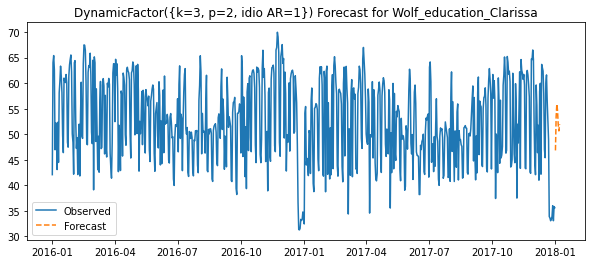

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1) Subsample a small number of series for tractability
np.random.seed(42)
N = 10
sampled = np.random.choice(df.columns, size=N, replace=False)
df_sub = df[sampled].copy()

# 2) Aggregate to daily averages
wide_daily = df_sub.resample('D').mean()

# 3) Standardize each series (zero mean, unit variance)
means = wide_daily.mean()
stds  = wide_daily.std().replace(0, 1.0)
scaled = (wide_daily - means) / stds

# 4) Specify and fit a DynamicFactor:
#      - k_factors=3       → three common factors
#      - factor_order=2    → each factor follows AR(2)
#      - error_order=1     → each individual series has its own AR(1) idiosyncratic term
mod = DynamicFactor(
    scaled,
    k_factors=3,
    factor_order=2,
    error_order=1
)
res = mod.fit(maxiter=200, disp=True)

# 5) Print the model summary
print(res.summary())

# 6) Check residual autocorrelation (Ljung–Box at lag=10) for each series
lb_pvalues = {
    col: acorr_ljungbox(res.resid[col], lags=[10], return_df=True)['lb_pvalue'].iloc[0]
    for col in res.resid.columns
}
print("\nLjung–Box p-values (lag=10) by series:")
print(pd.Series(lb_pvalues, name='lb_pvalue').to_frame())

# 7) Forecast 7 days ahead on the standardized scale
f_std  = res.forecast(steps=7)

# 8) Invert the standardization back to original units
f_orig = f_std.mul(stds, axis=1).add(means, axis=1)
print("\n7-day daily forecast (original scale):")
print(f_orig)

# -----------------------------------------------------------------------------
# If you’d like to visualize one series, for example the first sampled:
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt
ser = sampled[0]
plt.figure(figsize=(10,4))
plt.plot(wide_daily.index, wide_daily[ser], label='Observed')
plt.plot(f_orig.index, f_orig[ser], '--', label='Forecast')
plt.title(f"DynamicFactor({{k=3, p=2, idio AR=1}}) Forecast for {ser}")
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           78     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84613D+01    |proj g|=  6.59756D-01


 This problem is unconstrained.



At iterate    1    f=  1.80549D+01    |proj g|=  6.66997D-01

At iterate    2    f=  1.79022D+01    |proj g|=  6.09007D-01

At iterate    3    f=  1.77982D+01    |proj g|=  3.76220D-01

At iterate    4    f=  1.77360D+01    |proj g|=  3.73543D-01

At iterate    5    f=  1.77088D+01    |proj g|=  1.87913D-01

At iterate    6    f=  1.76898D+01    |proj g|=  1.37739D-01

At iterate    7    f=  1.76510D+01    |proj g|=  2.78897D-01

At iterate    8    f=  1.76428D+01    |proj g|=  2.41794D-01

At iterate    9    f=  1.76358D+01    |proj g|=  3.19953D-02

At iterate   10    f=  1.76344D+01    |proj g|=  3.53975D-02

At iterate   11    f=  1.76299D+01    |proj g|=  1.06157D-01

At iterate   12    f=  1.76217D+01    |proj g|=  1.92025D-01

At iterate   13    f=  1.76024D+01    |proj g|=  2.87023D-01

At iterate   14    f=  1.75647D+01    |proj g|=  3.53447D-01

At iterate   15    f=  1.75446D+01    |proj g|=  4.10428D-01

At iterate   16    f=  1.75285D+01    |proj g|=  3.02015D-01

At iter

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  163    f=  7.23217D+00    |proj g|=  6.18348D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   78    163    190      1     0     0   6.183D-01   7.232D+00
  F =   7.2321682976561794     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        
                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor'

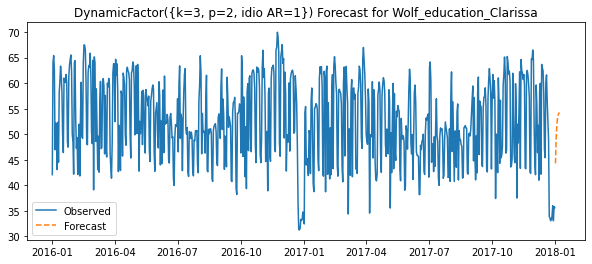

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.stats.diagnostic import acorr_ljungbox


# 1) Subsample a small number of series for tractability
np.random.seed(42)
N = 10
sampled = np.random.choice(df.columns, size=N, replace=False)
df_sub = df[sampled].copy()

# 2) Aggregate to daily averages
wide_daily = df_sub.resample('D').mean()

# 3) Standardize each series (zero mean, unit variance)
means = wide_daily.mean()
stds  = wide_daily.std().replace(0, 1.0)
scaled = (wide_daily - means) / stds

# 4) Specify and fit a DynamicFactor:
#      - k_factors=3       → three common factors
#      - factor_order=2    → each factor follows AR(2)
#      - error_order=2     → each individual series has its own AR(2) idiosyncratic term
mod = DynamicFactor(
    scaled,
    k_factors=3,
    factor_order=2,
    error_order=2
)
res = mod.fit(maxiter=200, disp=True)

# 5) Print the model summary
print(res.summary())

# 6) Check residual autocorrelation (Ljung–Box at lag=10) for each series
lb_pvalues = {
    col: acorr_ljungbox(res.resid[col], lags=[10], return_df=True)['lb_pvalue'].iloc[0]
    for col in res.resid.columns
}
print("\nLjung–Box p-values (lag=10) by series:")
print(pd.Series(lb_pvalues, name='lb_pvalue').to_frame())

# 7) Forecast 7 days ahead on the standardized scale
f_std  = res.forecast(steps=7)

# 8) Invert the standardization back to original units
f_orig = f_std.mul(stds, axis=1).add(means, axis=1)
print("\n7-day daily forecast (original scale):")
print(f_orig)

# -----------------------------------------------------------------------------
# If you’d like to visualize one series, for example the first sampled:
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt
ser = sampled[0]
plt.figure(figsize=(10,4))
plt.plot(wide_daily.index, wide_daily[ser], label='Observed')
plt.plot(f_orig.index, f_orig[ser], '--', label='Forecast')
plt.title(f"DynamicFactor({{k=3, p=2, idio AR=1}}) Forecast for {ser}")
plt.legend()
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          128     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78418D+01    |proj g|=  6.50039D-01

At iterate    1    f=  1.75740D+01    |proj g|=  6.92888D-01

At iterate    2    f=  1.75323D+01    |proj g|=  1.85784D-01

At iterate    3    f=  1.75232D+01    |proj g|=  1.06103D-01

At iterate    4    f=  1.75115D+01    |proj g|=  8.14507D-02

At iterate    5    f=  1.75064D+01    |proj g|=  1.19507D-01

At iterate    6    f=  1.74970D+01    |proj g|=  8.16851D-02

At iterate    7    f=  1.74859D+01    |proj g|=  4.15468D-02

At iterate    8    f=  1.74771D+01    |proj g|=  1.74491D-01

At iterate    9    f=  1.74671D+01    |proj g|=  8.41214D-02

At iterate   10    f=  1.74626D+01    |proj g|=  7.17253D-02

At iterate   11    f=  1.74481D+01    |proj g|=  6.74786D-02

At iterate   12    f=  1.74259D+01    |proj g|=  9.26602D-02

At iterate   13    f=  1.7

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  100    f=  1.06357D+01    |proj g|=  6.81651D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  128    100    117      1     0     0   6.817D-01   1.064D+01
  F =   10.635726318194125     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        
                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor'

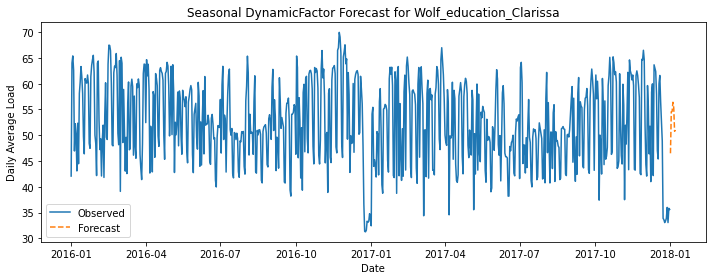

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 0) Assume `df` is your original wide‐format hourly DataFrame:
#      - index is already a DatetimeIndex
#      - columns are all building series
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# 1) Subsample a small number of series for tractability
# -----------------------------------------------------------------------------
np.random.seed(42)
N = 10
sampled = np.random.choice(df.columns, size=N, replace=False)
df_sub = df[sampled].copy()

# -----------------------------------------------------------------------------
# 2) Aggregate to daily averages
# -----------------------------------------------------------------------------
wide_daily = df_sub.resample('D').mean()

# -----------------------------------------------------------------------------
# 3) Standardize each series (zero mean, unit variance)
# -----------------------------------------------------------------------------
means = wide_daily.mean()
stds  = wide_daily.std().replace(0, 1.0)
scaled = (wide_daily - means) / stds

# -----------------------------------------------------------------------------
# 4) Build day‐of‐week dummy variables for weekly seasonality
# -----------------------------------------------------------------------------
dow = pd.get_dummies(wide_daily.index.dayofweek, prefix='dow', drop_first=True)
dow.index = wide_daily.index    # <— ALIGN INDICES!

# -----------------------------------------------------------------------------
# 5) Specify & fit the seasonal DynamicFactor model:
#      - exog=dow        → capture day‐of‐week effects
#      - k_factors=3     → three common factors
#      - factor_order=2  → factors follow AR(2)
#      - error_order=1   → idiosyncratic AR(1) per series
# -----------------------------------------------------------------------------
mod = DynamicFactor(
    endog=scaled,
    exog=dow,
    k_factors=3,
    factor_order=2,
    error_order=1
)
res = mod.fit(maxiter=200, disp=True)

# -----------------------------------------------------------------------------
# 6) Print the full model summary
# -----------------------------------------------------------------------------
print(res.summary())

# -----------------------------------------------------------------------------
# 7) Residual diagnostics (Ljung–Box at lag=10) for each series
# -----------------------------------------------------------------------------
lb_pvalues = {
    col: acorr_ljungbox(res.resid[col], lags=[10], return_df=True)['lb_pvalue'].iloc[0]
    for col in res.resid.columns
}
print("\nLjung–Box p-values (lag=10):")
print(pd.Series(lb_pvalues, name='lb_pvalue').to_frame())

# -----------------------------------------------------------------------------
# 8) Forecast 7 days ahead:
#    • Build future dow dummies and align
#    • Forecast on standardized scale, then invert scaling
# -----------------------------------------------------------------------------
f_index = pd.date_range(
    start=wide_daily.index[-1] + pd.Timedelta(days=1),
    periods=7,
    freq='D'
)
dow_fut = pd.get_dummies(f_index.dayofweek, prefix='dow', drop_first=True)
dow_fut.index = f_index
dow_fut = dow_fut.reindex(columns=dow.columns, fill_value=0)

f_std  = res.forecast(steps=7, exog=dow_fut)
f_orig = f_std.mul(stds, axis=1).add(means, axis=1)

print("\n7-day daily forecast (original scale):")
print(f_orig)

# -----------------------------------------------------------------------------
# 9) (Optional) Visualize one series’ fit & forecast
# -----------------------------------------------------------------------------
ser = sampled[0]
plt.figure(figsize=(10,4))
plt.plot(wide_daily.index, wide_daily[ser], label='Observed')
plt.plot(f_orig.index, f_orig[ser], '--', label='Forecast')
plt.title(f"Seasonal DynamicFactor Forecast for {ser}")
plt.xlabel("Date")
plt.ylabel("Daily Average Load")
plt.legend()
plt.tight_layout()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           58     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51355D+01    |proj g|=  6.15645D-01


 This problem is unconstrained.



At iterate    1    f=  1.48183D+01    |proj g|=  5.75807D-01

At iterate    2    f=  1.47020D+01    |proj g|=  4.15511D-01

At iterate    3    f=  1.46517D+01    |proj g|=  3.01244D-01

At iterate    4    f=  1.46189D+01    |proj g|=  1.49101D-01

At iterate    5    f=  1.46012D+01    |proj g|=  1.72220D-01

At iterate    6    f=  1.45629D+01    |proj g|=  2.07946D-01

At iterate    7    f=  1.45524D+01    |proj g|=  3.14791D-01

At iterate    8    f=  1.45440D+01    |proj g|=  5.45461D-02

At iterate    9    f=  1.45410D+01    |proj g|=  4.97929D-02

At iterate   10    f=  1.45344D+01    |proj g|=  1.14316D-01

At iterate   11    f=  1.45221D+01    |proj g|=  1.97837D-01

At iterate   12    f=  1.45024D+01    |proj g|=  2.64578D-01

At iterate   13    f=  1.44929D+01    |proj g|=  2.89269D-01

At iterate   14    f=  1.44716D+01    |proj g|=  1.36494D-01

At iterate   15    f=  1.44513D+01    |proj g|=  1.15677D-01

At iterate   16    f=  1.44331D+01    |proj g|=  2.43507D-01

At iter

/Users/fuweihua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                                                      Statespace Model Results                                                                                                                                      
Dep. Variable:     ['Wolf_education_Clarissa', 'Robin_office_Victor', 'Rat_assembly_Ezequiel', 'Rat_other_Daphne', 'Rat_education_Jesse', 'Fox_education_Virgil', 'Robin_assembly_Colleen', 'Rat_public_Clyde', 'Hog_industrial_Jeremy', 'Rat_public_Leta']   No. Observations:                  731
Model:                                                                                                                                                                                                                    DynamicFactor(factors=2, order=2)   Log Likelihood               -6086.059
                                                                                                                         

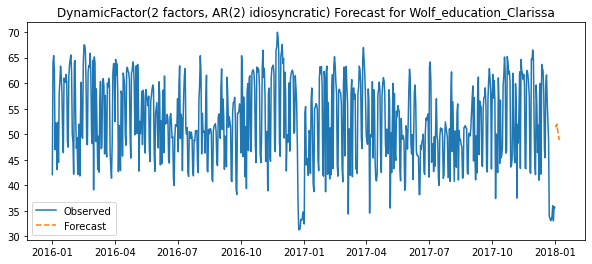

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.stats.diagnostic import acorr_ljungbox

# -----------------------------------------------------------------------------
# 0) Prepare your wide‐format DataFrame `df`:
#    - hourly index → DatetimeIndex
#    - columns are your building series
# -----------------------------------------------------------------------------
df.index = pd.to_datetime(df.index)

# 1) Subsample a small set to keep runtime reasonable
np.random.seed(42)
N = 10
sampled = np.random.choice(df.columns, size=N, replace=False)
df_sub = df[sampled].copy()

# 2) Aggregate to daily
wide_daily = df_sub.resample('D').mean()

# 3) Standardize
means = wide_daily.mean()
stds  = wide_daily.std().replace(0, 1.0)
scaled = (wide_daily - means) / stds

# -----------------------------------------------------------------------------
# 4) Final DynamicFactor specification:
#     • k_factors=2      → two strong common factors
#     • factor_order=2   → AR(2) on factors
#     • error_order=2    → AR(2) idiosyncratic errors
# -----------------------------------------------------------------------------
mod_final = DynamicFactor(
    endog=scaled,
    k_factors=2,
    factor_order=2,
    error_order=2
)
res_final = mod_final.fit(maxiter=200, disp=True)

# 5) Summary
print(res_final.summary())

# 6) Residual diagnostics
lb = {
    col: acorr_ljungbox(res_final.resid[col], lags=[10], return_df=True)['lb_pvalue'].iloc[0]
    for col in scaled.columns
}
print("\nLjung–Box p-values (lag=10):")
print(pd.Series(lb, name='lb_pvalue').to_frame())

# 7) 7-day forecast (back in original units)
f_std  = res_final.forecast(steps=7)
f_orig = f_std.mul(stds, axis=1).add(means, axis=1)
print("\n7-day daily forecast (original scale):")
print(f_orig)

# 8) Example plot for the first series
ser = scaled.columns[0]
plt.figure(figsize=(10,4))
plt.plot(wide_daily.index, wide_daily[ser], label='Observed')
plt.plot(f_orig.index, f_orig[ser], '--', label='Forecast')
plt.title(f"DynamicFactor(2 factors, AR(2) idiosyncratic) Forecast for {ser}")
plt.legend()
plt.show()


In [ ]:
# extract the “use” part of each column name
primary_uses = [col.split('_')[1] for col in df.columns]

# 1) list them alphabetically
print("All primary uses:")
print(sorted(set(primary_uses)))

# 2) (optionally) show how many columns per use
import pandas as pd
print("\nCounts per primary use:")
print(pd.Series(primary_uses).value_counts())


In [ ]:

# ---- parameters ----
min_count = 8

# ---- extract primary uses & count ----
cols         = [c for c in df.columns]
primary_uses = [c.split('_')[1] for c in cols]
use_counts   = pd.Series(primary_uses).value_counts()
 

# rare if below min_count, but drop our exceptions
rare_uses = set(use_counts[use_counts < min_count].index) - {"utility"}


# ---- rebuild column names, mapping rares → "Other" ----
new_cols = []
for col in cols:
    building, use, site = col.split('_', 2)
    if use in rare_uses:
        use = 'Other'
    new_cols.append(f"{building}_{use}_{site}")

# assign back
df.columns = new_cols

# ---- quick sanity check ----
print("Remaining primary‐use counts:")
print(pd.Series([c.split('_')[1] for c in df.columns]).value_counts())


In [ ]:
meta = pd.DataFrame(
    [c.split('_',2) for c in df.columns],
    columns=['building','primary_use','site'],
    index=df.columns
)

## New predictors: lags, rolling windows, cyclical

Lag 1 hour (lag_1)
Captures the immediate inertia in the signal—most energy‐use today is highly correlated with the previous hour.

Lag 24 hours (lag_24)
Grabs the daily cycle (e.g. same hour yesterday).

Lag 168 hours (lag_168)
Captures a weekly pattern (e.g. same hour last week).

Rolling mean over 24 hours (roll_mean_24)
Smooths out hourly noise and highlights the local daily trend.

Rolling mean over 168 hours (roll_mean_168)
Exposes the weekly baseline—useful for spotting gradual shifts in usage.

Cyclical encoding
Without sine/cos transforms, 23 → 0 “wraps” poorly (a tree will see them as far apart). Sine/cos let the model learn smooth circular trends.

In [ ]:

# 1) Bring timestamp into a column so we can both group and add time features:
# df_feat = panel.reset_index().rename(columns={'index':'timestamp'})

# 2) Create the lag & rolling‐mean predictors:
lags    = [1, 24, 168]
windows = [24, 168]

feats = df.copy()

# 2a) Lag features (1h, 24h, 168h)
for lag in lags:
    shifted = df.shift(lag)
    shifted.columns = [f"{c}_lag{lag}" for c in df.columns]
    feats = pd.concat([feats, shifted], axis=1)

# 2b) Rolling‐mean features (over past 24h & 168h, excluding the current hour)
for w in windows:
    rolled = df.shift(1).rolling(window=w).mean()
    rolled.columns = [f"{c}_roll{w}" for c in df.columns]
    feats = pd.concat([feats, rolled], axis=1)

# 3) Time‐based & cyclical encodings
feats = feats.reset_index().rename(columns={'index':'timestamp'})
feats['hour']  = feats['timestamp'].dt.hour
feats['dow']   = feats['timestamp'].dt.dayofweek
feats['month'] = feats['timestamp'].dt.month

for name, period in [('hour',24), ('dow',7), ('month',12)]:
    feats[f'{name}_sin'] = np.sin(2*np.pi*feats[name]/period)
    feats[f'{name}_cos'] = np.cos(2*np.pi*feats[name]/period)
    

In [ ]:
# 4) Feature engineering on wide tables
raw   = df.copy()
feats = raw.copy()

# 4.1) lagged
for lag in lags:
    tmp = raw.shift(lag)
    tmp.columns = [f"{col}_lag{lag}" for col in raw.columns]
    feats = pd.concat([feats, tmp], axis=1)

# 4.2) Rolling mean feature (excluding the current moment, so shift(1) first)
for w in windows:
    tmp = raw.shift(1).rolling(window=w).mean()
    tmp.columns = [f"{col}_roll{w}" for col in raw.columns]
    feats = pd.concat([feats, tmp], axis=1)

# 4.3) Time and cyclical encoding
feats = feats.reset_index().rename(columns={'index':'timestamp'})
feats['hour']  = feats['timestamp'].dt.hour
feats['dow']   = feats['timestamp'].dt.dayofweek
feats['month'] = feats['timestamp'].dt.month

for name, period in [('hour',24), ('dow',7), ('month',12)]:
    feats[f'{name}_sin'] = np.sin(2*np.pi*feats[name] / period)
    feats[f'{name}_cos'] = np.cos(2*np.pi*feats[name] / period)

# 5) long panel
panel_list = []

for series in raw.columns:
    cols_seq = (
        [series] +
        [f"{series}_lag{lag}"   for lag in lags] +
        [f"{series}_roll{w}"    for w in windows]
    )
    tmp = feats[['timestamp'] + cols_seq].dropna().copy()
    
    # rename
    rename_map = {series: 'y'}
    rename_map.update({f"{series}_lag{lag}": f"lag_{lag}" for lag in lags})
    rename_map.update({f"{series}_roll{w}":  f"roll_{w}" for w in windows})
    tmp = tmp.rename(columns=rename_map)
    
    # add series
    tmp['series'] = series
    panel_list.append(tmp)

# 5.4 combine all the series
panel = pd.concat(panel_list, ignore_index=True)

# 5.5 Merge time & period features (sin/cos)
time_cols = ['timestamp',
             'hour','hour_sin','hour_cos',
             'dow','dow_sin','dow_cos',
             'month','month_sin','month_cos']
time_feats = feats[time_cols].drop_duplicates(subset=['timestamp'])
panel = panel.merge(time_feats, on='timestamp', how='left')

# 5.6 Merge primary_use & building
panel = panel.merge(
    meta[['primary_use','building']],
    left_on='series', right_index=True, how='left'
)

In [ ]:
from sklearn.model_selection import train_test_split

# 1) One-Hot to primary_use & building
panel_enc = pd.get_dummies(
    panel,
    columns=['primary_use','building'],
    drop_first=False   
)

# 2) 
X = panel_enc.drop(columns=['y','series','timestamp'])
y = panel_enc['y']

# 3) Calculate the sample weight of each row according to the primary_use frequency
pu_counts = panel['primary_use'].value_counts()
w = panel['primary_use'].map(lambda u: 1.0 / pu_counts[u])

# 4) Divide the training/test set (and the corresponding weight vector at the same time)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2, random_state=42, shuffle=True
)

# Split into train and test sets (no shuffle for time series)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=42,
    shuffle=False
)

# Set up time-series cross-validator
tscv = TimeSeriesSplit(n_splits=3)

# Custom RMSE scorer (negative because higher is better in sklearn)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Define hyperparameter search space
param_dist = {
    'n_estimators':    [100, 200, 300],
    'max_depth':       [3, 6, 9],
    'learning_rate':   [0.01, 0.05, 0.1],
    'subsample':       [0.7, 0.8, 1.0],
    'colsample_bytree':[0.7, 0.8, 1.0],
}

# Randomized search with time-series CV
rs = RandomizedSearchCV(
    XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring=rmse_scorer,
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run hyperparameter tuning (with sample weights)
rs.fit(X_train, y_train, sample_weight=w_train)

print("Best CV RMSE:", -rs.best_score_)
print("Best hyperparameters:", rs.best_params_)

# 13) Final evaluation on test set
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", test_rmse)

